<a href="https://colab.research.google.com/github/adityagarg2109/Water-Potability/blob/main/WATER_POTABILITY_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

##Load and preprocess the dataset

In [ ]:
# Load the dataset
data = pd.read_csv('/content/water_potability.csv')

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


###Assessment

The dataset contains 3276 rows and the following columns:

- **`ph`**: pH level of water.
- **`Hardness`**: Measures the concentration of calcium and magnesium.
- **`Solids`**: Total dissolved solids in water.
- **`Chloramine`s**: Concentration of chlorine compounds.
- **`Sulfate`**: Concentration of sulfate in water.
- **`Conductivity`**: Water's ability to conduct electricity.
- **`Organic_carbon`**: Organic compounds present in the water.
- **`Trihalomethanes`**: By-products of chlorine in water.
- **`Turbidity`**: Water clarity.
- **`Potability`**: A binary classification indicating if the water is safe for drinking (1) or not (0).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


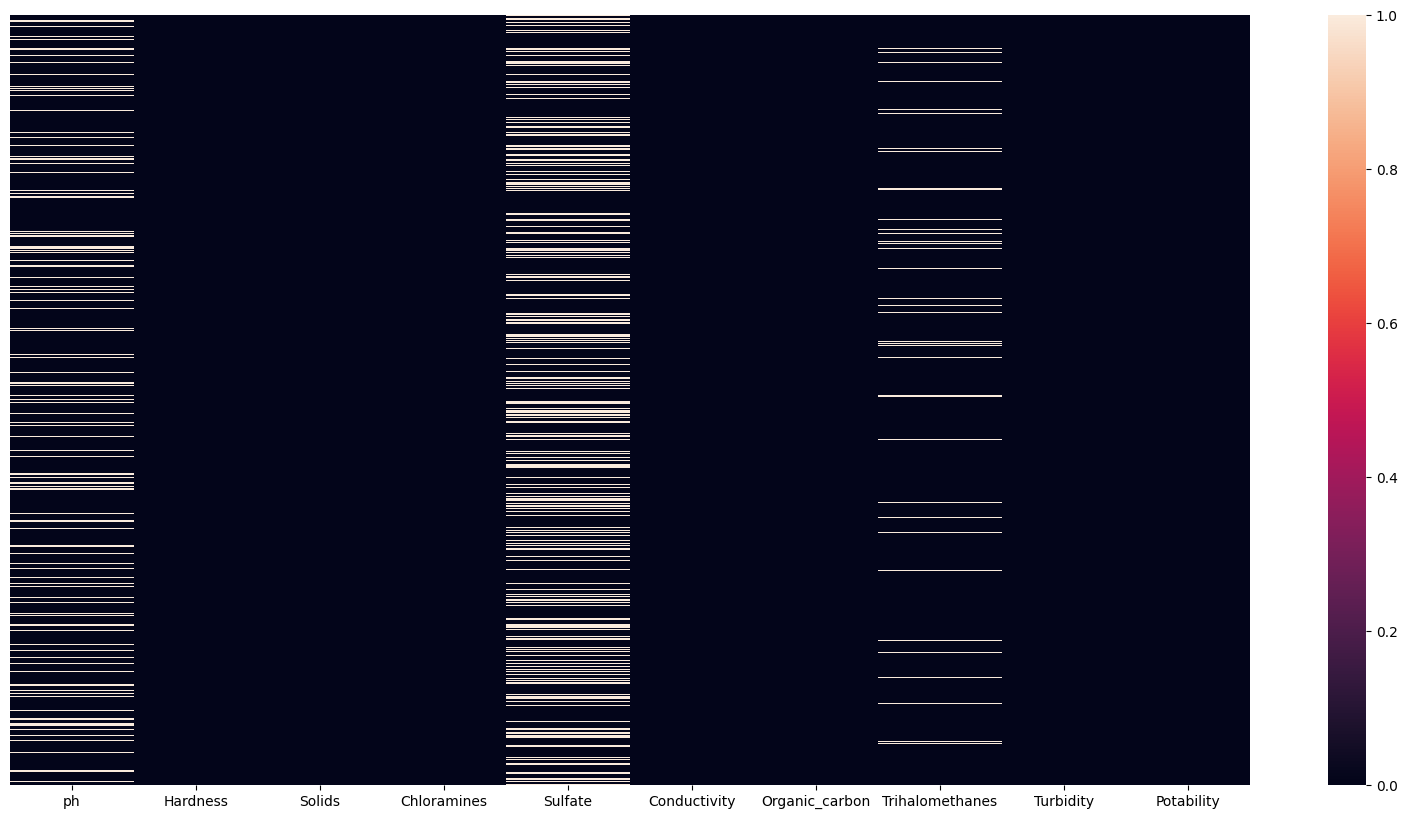

In [ ]:
#before data is averaged

plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(), yticklabels = False)
plt.show()

We see that some missing values in ph, Sulphates and Trihalomethane columns. We can choose to remove these columns completely or omit the missing values with either mean or median of the entire column.

As very less percentage of data is missing, it is advised to substitute the missing values with mean/median.

In [ ]:
data.mean()

,0
ph,7.080795
Hardness,196.369496
Solids,22014.092526
Chloramines,7.122277
Sulfate,333.775777
Conductivity,426.205111
Organic_carbon,14.284970
Trihalomethanes,66.396293
Turbidity,3.966786
Potability,0.390110


In [ ]:
data.median()

,0
ph,7.036752
Hardness,196.967627
Solids,20927.833607
Chloramines,7.130299
Sulfate,333.073546
Conductivity,421.884968
Organic_carbon,14.218338
Trihalomethanes,66.622485
Turbidity,3.955028
Potability,0.000000


Median is substituted in the missing values

In [ ]:
data=data.fillna(data.median())

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


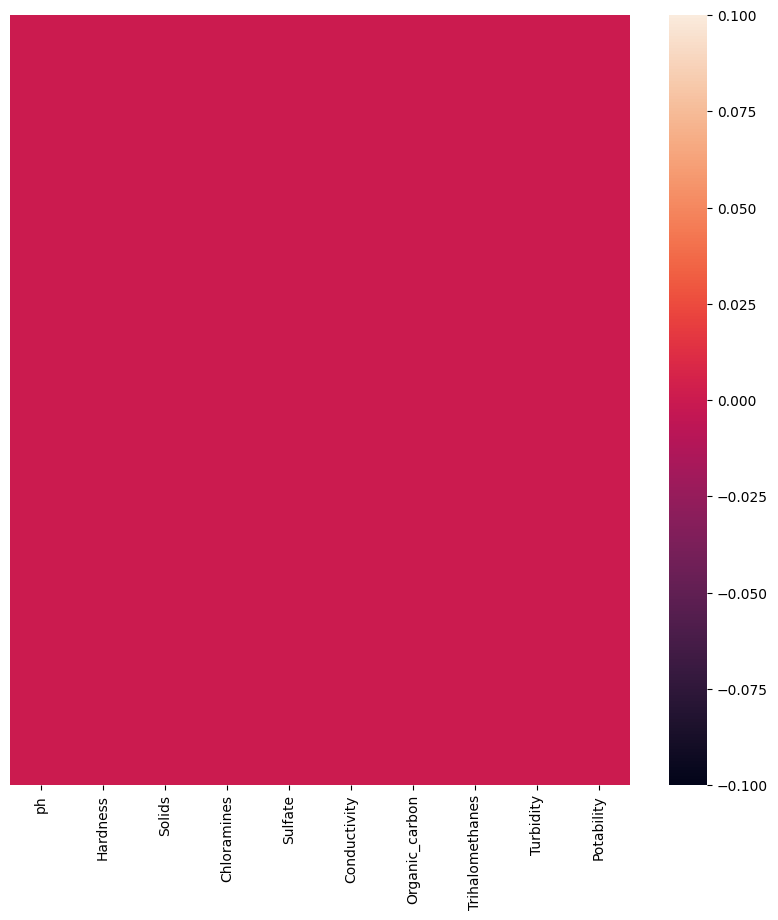

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(), yticklabels = False)
plt.show()

In [ ]:
#randomize the order of all the rows in tha data

data = data.sample(frac=1, random_state=42)

In [ ]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2947,7.036752,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,0
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,1
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,0
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,0
2045,6.615350,179.240661,26392.863612,9.309160,333.073546,496.363562,12.786595,78.262369,4.453443,1
263,13.175402,47.432000,19237.949676,8.907020,375.147315,500.245952,12.083896,66.622485,4.106924,1
1042,5.499489,230.308775,13902.968646,9.619575,352.084333,442.167006,14.740787,66.622485,5.846827,0
2263,11.235426,178.596496,33773.107061,9.063042,327.650960,425.868039,17.986255,58.986652,5.147055,0
450,7.036752,139.331152,2912.211247,10.338234,343.318021,532.885196,11.078341,42.172824,4.093098,0
1832,7.036752,233.846621,32496.640216,6.637384,347.986448,424.649773,13.028000,55.983973,4.296189,0


In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


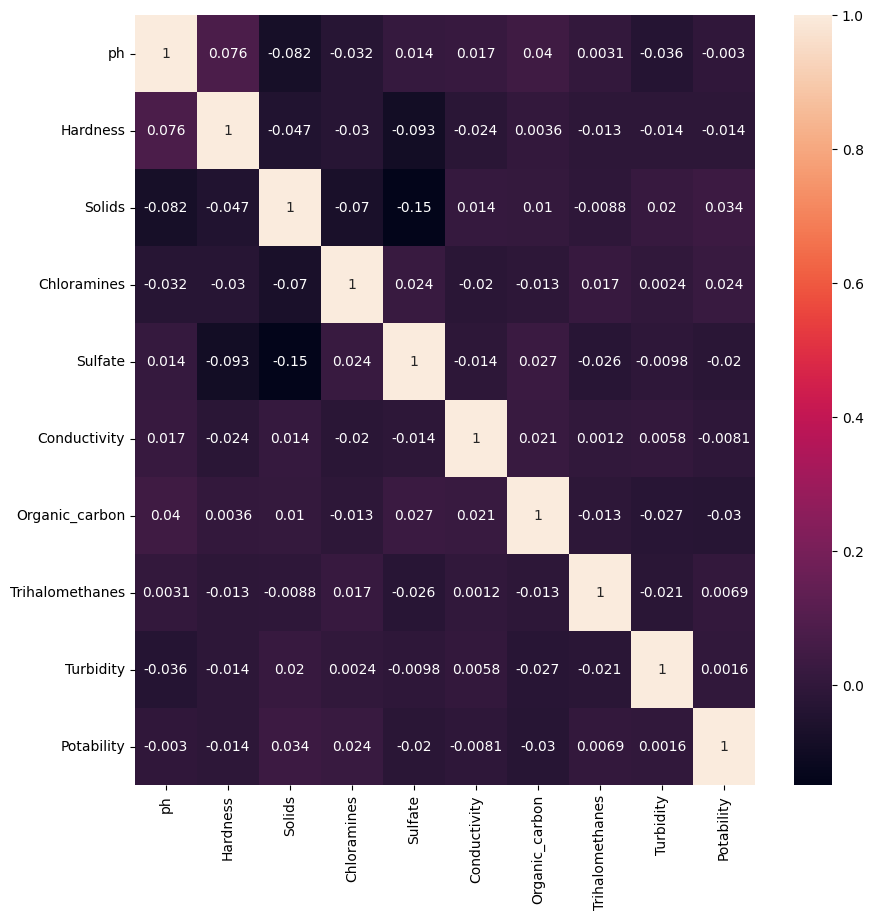

In [ ]:
correlation_matrix=data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

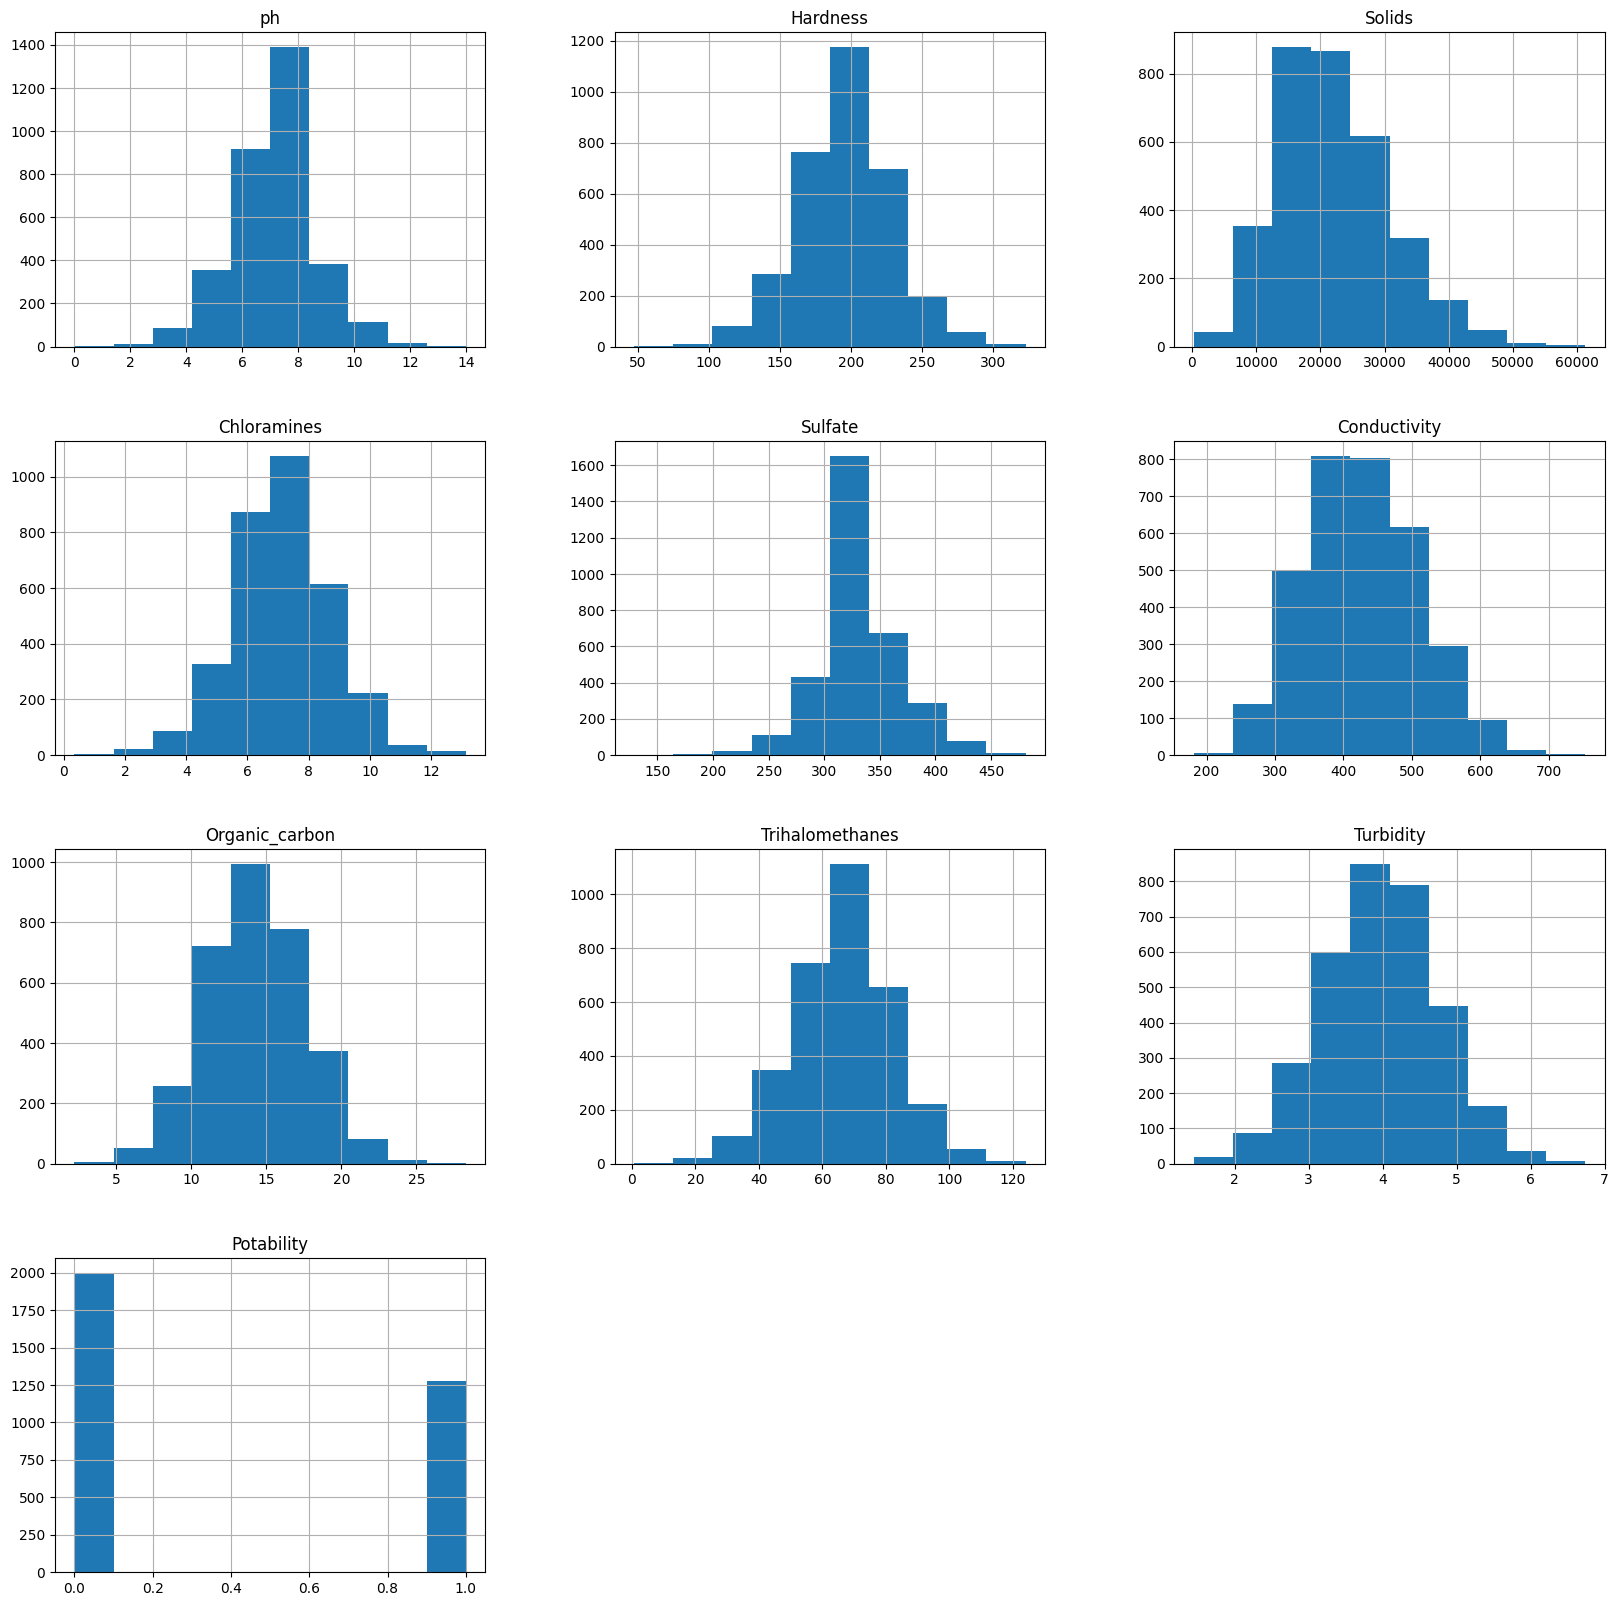

In [ ]:
data.hist(bins=10,figsize = (20,20))
plt.show()

pH is an important factor in determining water quality. The ideal pH value for potable water is between 6.5 and 8.5.


In [ ]:
# Feature scaling
scaler = StandardScaler()
features = data.drop('Potability', axis=1)
X = scaler.fit_transform(features)
y=data['Potability']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

In [ ]:
X

array([[-0.02547355, -0.39082858, -0.17711859, ...,  1.78194369,
         0.03884084,  1.17889387],
       [-0.29325773, -0.22679888,  1.23867225, ...,  0.1275344 ,
         0.09116004,  0.76309049],
       [ 0.52514367,  0.84226912,  0.14257834, ..., -0.26551507,
        -1.47976643, -1.89528014],
       ...,
       [-0.30196283, -0.29227326,  1.01798723, ..., -0.1418567 ,
         1.29034876, -0.61030501],
       [ 1.16271321,  0.65896618, -0.6650338 , ...,  0.62568457,
        -1.22444486,  0.39390641],
       [-0.25584137,  0.05830532,  1.4442152 , ..., -0.63739737,
         0.01363603, -0.26735401]])

In [ ]:
y

,Potability
2947,0
2782,1
1644,0
70,0
2045,1
...,...
1095,1
1130,1
1294,0
860,0


In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}



# Train and evaluate models
results = {}
for model_name, model in models.items():
  print(f"Training {model_name}...")

  # Train the model
  model.fit(X_train, y_train)
  # Predict on test set
  print(f"Predicting {model_name}...")
  y_pred = model.predict(X_test)
  # Evaluate the model
  #rcc = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  result_test = model.score(X_test, y_test)
  result_train = model.score(X_train, y_train)

  print(f"{model_name} Predicted!!!")

  results[model_name] = {
    'Training Score': result_train,
    'Testing Score': result_test,
    #'R2 Score': rcc,
    'Root Mean Squared Error': rmse,
    'Cross Validation Score': cross_val_score(model, X, y, cv=3).mean()
}

pd.DataFrame(results).T


Training Logistic Regression...
Predicting Logistic Regression...
Logistic Regression Predicted!!!
Training Random Forest...
Predicting Random Forest...
Random Forest Predicted!!!
Training Decision Tree...
Predicting Decision Tree...
Decision Tree Predicted!!!
Training k-Nearest Neighbors...
Predicting k-Nearest Neighbors...
k-Nearest Neighbors Predicted!!!
Training XGBoost...
Predicting XGBoost...
XGBoost Predicted!!!


,Training Score,Testing Score,Root Mean Squared Error,Cross Validation Score
Logistic Regression,0.611069,0.612805,0.622250,0.611111
Random Forest,1.000000,0.647866,0.593409,0.674603
Decision Tree,1.000000,0.551829,0.669456,0.562576
k-Nearest Neighbors,0.764504,0.615854,0.619795,0.625153
XGBoost,0.998473,0.625000,0.612372,0.638584



### Summary
- The **Random Forest** model performed the best in terms of accuracy (66.15%).
- The **XGBoost** classifier also performed well with an accuracy of 62.5%.
- **Logistic Regression** and **k-Nearest Neighbors** had lower accuracy, around 61-62%.

We could further improve the models by tuning hyperparameters and using different feature engineering techniques.

In [ ]:


# Feature importance using Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

features_df



,Feature,Importance
4,Sulfate,0.129398
0,ph,0.128875
1,Hardness,0.119898
2,Solids,0.114168
3,Chloramines,0.112693
5,Conductivity,0.101212
6,Organic_carbon,0.098932
7,Trihalomethanes,0.097481
8,Turbidity,0.097342


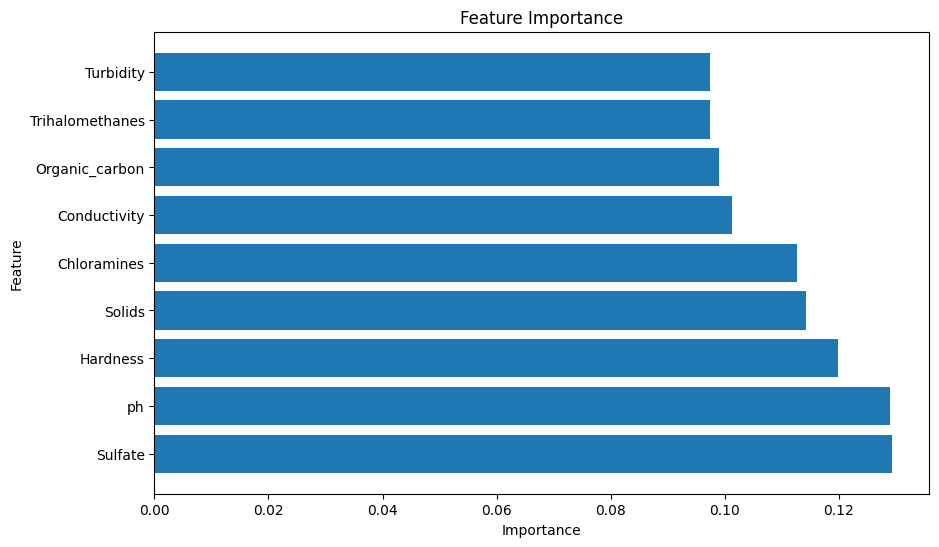

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Example: creating interaction terms or polynomial features


poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_rf.best_params_}")
best_rf = grid_rf.best_estimator_


Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 20, 'n_estimators': 200}


### Model Evaluation

To evaluate the performance of our models, we will use the following metrics:
- **Accuracy**: The proportion of correctly classified samples.
- **Precision**: The ratio of correctly predicted positive observations.
- **Recall**: The ability of the model to detect all positive samples.
- **F1-Score**: A balance between precision and recall.
We will also use a confusion matrix to visualize how well the model differentiates between potable and non-potable water.


In [ ]:
# Evaluate the best Random Forest model
y_pred_rf = best_rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6448170731707317
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       401
           1       0.59      0.29      0.39       255

    accuracy                           0.64       656
   macro avg       0.62      0.58      0.57       656
weighted avg       0.63      0.64      0.61       656



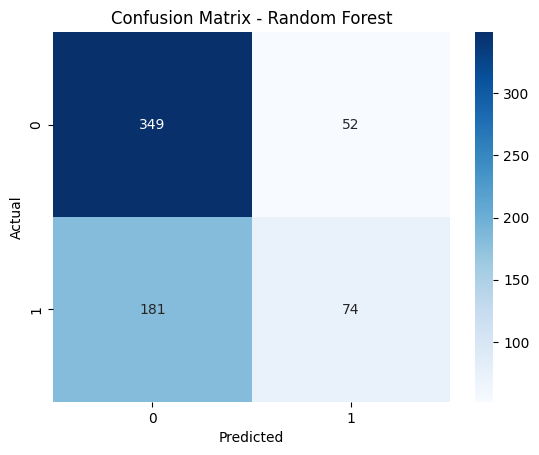

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error

# Calculate and Print the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', rmse)

# Calculate Print the mean squared error
mse = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:', mse)

# Calculate the accuracy on the training dataset
train_accuracy = best_rf.score(X_train, y_train)
print('Training Accuracy:', train_accuracy)


# Calculate the accuracy on the testing dataset
test_accuracy = best_rf.score(X_test, y_test)
print('Testing Accuracy:', test_accuracy)



Root Mean Squared Error: 0.5959722534055325
Mean Squared Error: 0.3551829268292683
Training Accuracy: 0.9385496183206107
Testing Accuracy: 0.6448170731707317


### Conclusion

In this project, we successfully built a machine learning model to predict water potability based on various quality parameters. The best-performing model was **Random Forest Classifier**, achieving an accuracy of:

*   0.9385496183206107 (training accuracy)
*   0.6448170731707317 (testing accuracy)


### Future Work
- We can improve model performance by collecting more data or using advanced models like Gradient Boosting or Neural Networks.
- Deploying this model as a web service could provide real-time predictions for water quality monitoring.
